Frank Barbera

 - Alex Ipeker

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [114]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import seaborn as sns


In [115]:
def print_model(bias, Theta, X_names, model_name = None):
    # A function to print the equation of a linear model
    if model_name is None:
        model_str = f'y ='
    else:
        model_str = f'{model_name}:\n y ='

    if not bias==0:
        model_str += f' {bias:.2f}'
        
    for theta, x in zip(Theta, X_names):
        if theta==0:
            continue
        else:
            model_str+= f' + {theta:.2f}*{x}'
    print(model_str)

In [116]:
np.random.seed(15)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 5 --> simple linear regression
                                   noise=10, 
                                   bias = bias, 
                                   random_state=5, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,0.441227,-0.330870,2.430771,-0.252092,0.109610,244.349429
1,1.582481,-0.909232,-0.591637,0.187603,-0.329870,-66.739816
2,-1.192765,-0.204877,-0.358829,0.603472,-1.664789,-154.409110
3,-0.700179,1.151391,1.857331,-1.511180,0.644848,194.236600
4,-0.980608,-0.856853,-0.871879,-0.422508,0.996440,-87.092471
...,...,...,...,...,...,...
295,0.423162,-0.988746,0.741750,1.130381,-0.189154,67.307896
296,-2.075862,-0.911934,0.037560,0.697767,-0.506700,-90.781843
297,1.006915,-0.513603,-1.360830,0.438510,-0.675455,-150.392513
298,1.310846,1.089519,-0.400579,-0.621525,0.217709,11.909130


In [117]:
# Your code here. Add cells as needed.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

y_pred_train = model_1.predict(X_train)
y_pred_test = model_1.predict(X_test)

R2_train = model_1.score(X_train, y_train)
R2_test = model_1.score(X_test, y_test)

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

print(model_1.__dict__)

{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'n_features_in_': 5, 'coef_': array([21.52476416, 21.0447652 , 95.89526884,  6.65896819, 49.20515152]), 'rank_': 5, 'singular_': array([17.14087565, 16.37959118, 15.55438107, 14.33062407, 13.89550251]), 'intercept_': -6.884670944255213}


In [118]:
print(coef)

[21.87990264 21.20699885 96.62079325  6.92937604 48.31504389]


In [119]:
print(f'R2_train: {R2_train}')
print(f'R2_test: {R2_test}')
print(f'MSE_train: {MSE_train}')
print(f'MSE_test: {MSE_test}')

R2_train: 0.9928262025191834
R2_test: 0.99285183178066
MSE_train: 98.39719536660398
MSE_test: 85.50162291627632


#### Your written answers here

What are your model parameters?
 - Coefficients: [21.87990264 21.20699885 96.62079325  6.92937604 48.31504389]
 - Intercept: -6.884670944255213

What were your MSE and R^2?
 - MSE: 98.39719536660398
 - R2: 0.8649065144835245



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [120]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 10 --> multiple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True)

Xa = (0.6*X[:, 2] + 0.4*X[:, 5]).reshape(-1, 1)
X = np.hstack([X, Xa])
coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

print_model(bias, coef, column_names, model_name = 'True Model')

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6


In [121]:
reg2_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,-0.019007,-0.081434,-0.014396,0.005781,0.041543,-0.030161,0.001037,-0.024288,-0.004252,-0.020702,-25.236430
1,0.008066,0.007271,-0.012255,-0.062581,0.032108,0.030362,-0.005309,-0.017288,0.012837,0.004792,-12.537903
2,0.032845,-0.063578,-0.009525,0.020147,-0.019702,-0.053699,-0.011607,-0.039859,-0.024391,-0.027195,-22.264183
3,-0.009999,-0.125704,0.015806,-0.008291,-0.057393,-0.063838,-0.005211,0.097825,-0.033332,-0.016052,-37.087455
4,-0.004742,0.057318,0.009264,-0.047371,0.032000,-0.038891,-0.037838,-0.076428,0.050613,-0.009998,-14.858578


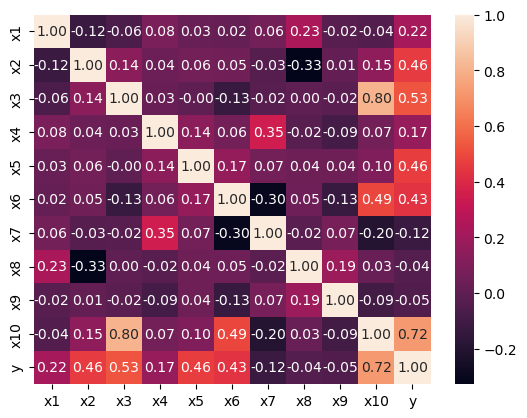

In [122]:
corr = reg2_df.corr()

sns.heatmap(corr, annot=True, fmt = '.2f')
plt.show()

In [123]:
candidate_idx = np.array([1, 2, 3, 4, 5, 10])-1
Z = X[:, candidate_idx]
Z_names = [column_names[idx] for idx in candidate_idx]

Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2,)

model_LR = LinearRegression()
model_LR.fit(Z_train, y_train)

R2_train = model_LR.score(Z_train, y_train)
R2_test = model_LR.score(Z_test, y_test)

mse_train = mean_squared_error(y_train, model_LR.predict(Z_train))
mse_test = mean_squared_error(y_test, model_LR.predict(Z_test))

print(f'R2_train: {R2_train:.2f}\nR2_test: {R2_test:.2f}')
print(f'MSE_train: {mse_train:.2f}\nMSE_test: {mse_test:.2f}')

R2_train: 0.86
R2_test: 0.89
MSE_train: 9.92
MSE_test: 7.65


#### Your written answers here

What are your model parameters?
-  y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6

Which features (x1, x2...) were significant? Which were co-linear?
 - x2, x3, x5, x6, and x10 are signigicant. Every x was co-linear with itself on the y axis. (x1 and y1, x2 and y2, etc.)
 
What were your MSE and R^2?
 - R2: 0.89
 - MSE: 7.65



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [125]:
housing_df = pd.read_csv('kc_house_data.csv')
housing_df.drop(['id', 'date', 'zipcode',], axis=1, inplace=True)

### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


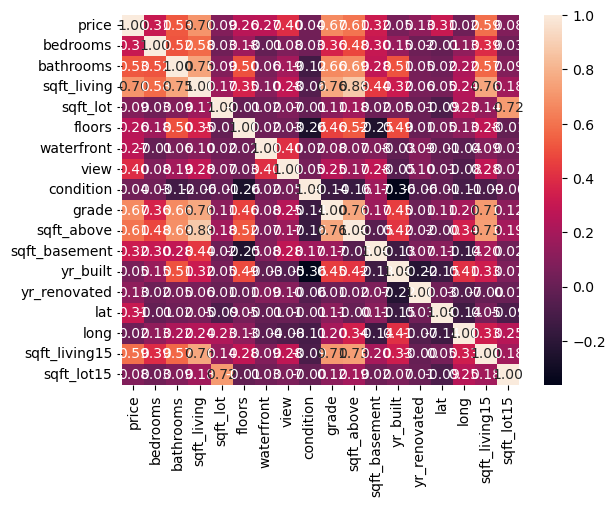

In [126]:
corr = housing_df.corr()

sns.heatmap(corr, annot=True, fmt = '.2f')
plt.show()

#### Your written answers here
Which features are you using and why?
 - we are using sqft living, bathrooms, and grade, becuase they have the highest ratings.

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

In [127]:
housing_df = pd.read_csv('kc_house_data.csv')
housing_df.drop(columns = ['zipcode', 'date', 'id'], inplace = True)
y = housing_df['price']
X = housing_df.drop(columns = 'price')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ss = StandardScaler()
X_scaled_train = ss.fit_transform(X_train)
X_scaled_test = ss.transform(X_test)

model_lasso = Lasso(alpha = 1000)
model_lasso.fit(X_scaled_train, y_train)

R2_train = model_lasso.score(X_scaled_train, y_train)
R2_test = model_lasso.score(X_scaled_test, y_test)

R2_train = model_lasso.score(X_scaled_train, y_train)
R2_test = model_lasso.score(X_scaled_test, y_test)

for k, (col, w) in enumerate(zip(X.columns, model_lasso.coef_)):
    print(f'(k).\t{col}:\t{w:.2f}')
    
print_model(model_lasso.intercept_, model_lasso.coef_, list(X.columns),'Lasso')

print(f'R2_train: {R2_train:.2f}\nR2_test: {R2_test:.2f}')

(k).	bedrooms:	-29713.20
(k).	bathrooms:	33982.64
(k).	sqft_living:	135923.50
(k).	sqft_lot:	3352.26
(k).	floors:	0.00
(k).	waterfront:	48491.04
(k).	view:	38863.24
(k).	condition:	18384.06
(k).	grade:	110463.73
(k).	sqft_above:	26073.89
(k).	sqft_basement:	0.00
(k).	yr_built:	-70566.20
(k).	yr_renovated:	8914.17
(k).	lat:	77155.84
(k).	long:	-16382.61
(k).	sqft_living15:	17029.33
(k).	sqft_lot15:	-8170.27
Lasso:
 y = 541136.64 + -29713.20*bedrooms + 33982.64*bathrooms + 135923.50*sqft_living + 3352.26*sqft_lot + 48491.04*waterfront + 38863.24*view + 18384.06*condition + 110463.73*grade + 26073.89*sqft_above + -70566.20*yr_built + 8914.17*yr_renovated + 77155.84*lat + -16382.61*long + 17029.33*sqft_living15 + -8170.27*sqft_lot15
R2_train: 0.69
R2_test: 0.71


### Your written answers here
Which regression did you use?
 - we used the lasso regression

Does your regularized model look better than your MLR? How so?
- the MLR model looks better in terms of performance metrics but the lasso model is more simple.

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

In [128]:
# Your code here. Add cells as needed.

housing_below = housing_df.query('price < 1000000')
housing_above = housing_df.query('price >= 1000000')

y_below = housing_below['price']
X_below = housing_below.drop(columns = 'price')
y_above = housing_above['price']
X_above = housing_above.drop(columns = 'price')

X_train_below, X_test_below, y_train_below, y_test_below = train_test_split(X_below, y_below, test_size=0.2)
X_train_above, X_test_above, y_train_above, y_test_above = train_test_split(X_above, y_above, test_size=0.2)

ss_below = StandardScaler()
X_scaled_train_below = ss_below.fit_transform(X_train_below)
X_scaled_test_below = ss_below.transform(X_test_below)

ss_above = StandardScaler()
X_scaled_train_above = ss_above.fit_transform(X_train_above)
X_scaled_test_above = ss_above.transform(X_test_above)

model_lasso_below = Lasso(alpha = 10000)
model_lasso_below.fit(X_scaled_train_below, y_train_below)

model_lasso_above = Lasso(alpha = 1000)
model_lasso_above.fit(X_scaled_train_above, y_train_above)

R2_train_below = model_lasso_below.score(X_scaled_train_below, y_train_below)
R2_test_below = model_lasso_below.score(X_scaled_test_below, y_test_below)
R2_train_above = model_lasso_above.score(X_scaled_train_above, y_train_above)
R2_test_above = model_lasso_above.score(X_scaled_test_above, y_test_above)

print(f'R2_train_below: {R2_train_below:.2f}\nR2_test_below: {R2_test_below:.2f}')
print(f'R2_train_above: {R2_train_above:.2f}\nR2_test_above: {R2_test_above:.2f}')

for k, (col, w) in enumerate(zip(X.columns, model_lasso_below.coef_)):
    print(f'(k).\t{col}:\t{w:.2f}')
    


R2_train_below: 0.66
R2_test_below: 0.68
R2_train_above: 0.53
R2_test_above: 0.49
(k).	bedrooms:	0.00
(k).	bathrooms:	2776.20
(k).	sqft_living:	52428.63
(k).	sqft_lot:	0.00
(k).	floors:	1277.44
(k).	waterfront:	0.00
(k).	view:	13834.71
(k).	condition:	6447.87
(k).	grade:	64531.60
(k).	sqft_above:	0.00
(k).	sqft_basement:	0.00
(k).	yr_built:	-26038.69
(k).	yr_renovated:	0.00
(k).	lat:	67004.20
(k).	long:	-0.00
(k).	sqft_living15:	21527.58
(k).	sqft_lot15:	0.00


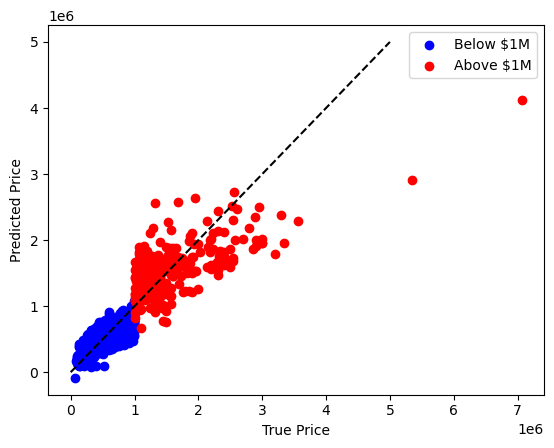

In [129]:
y_pred_test_below = model_lasso_below.predict(X_scaled_test_below)
y_pred_test_above = model_lasso_above.predict(X_scaled_test_above)

plt.scatter(y_test_below, y_pred_test_below, color = 'blue', label = 'Below $1M')
plt.scatter(y_test_above, y_pred_test_above, color = 'red', label = 'Above $1M')

plt.plot([0, 5000000], [0, 5000000], color = 'black', linestyle = '--')

plt.xlabel('True Price')
plt.ylabel('Predicted Price')

plt.legend()
plt.show()


 ### Your written answers here

 What are the $R^2$ for the two models?

  - For below it is 0.66, and For above it is 0.51
 
